# Hierarchical Clustering (HC) – In Depth Explanation

Hierarchical clustering is an **unsupervised machine learning** method that builds a **hierarchy of clusters**.
Unlike k-means, it does not require specifying the number of clusters beforehand.
Instead, it produces a **dendrogram** which encodes all possible clusterings at different levels.

---

## 1. Types of Hierarchical Clustering

1. **Agglomerative (Bottom-Up):**
   - Start with each data point as its own cluster.
   - Iteratively merge the two closest clusters.
   - Continue until all points are in one cluster.

2. **Divisive (Top-Down):**
   - Start with all points in one cluster.
   - Recursively split clusters.

Most commonly used: **Agglomerative Hierarchical Clustering (AHC).**

---

## 2. Mathematical Foundation

### 2.1 Distance Between Points

For data points \( x_i, x_j \in \mathbb{R}^n \), a common choice is **Euclidean distance**:

$$
d(x_i, x_j) = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2}
$$

### 2.2 Distance Between Clusters (Linkage Criteria)

- **Single linkage:**

$$
D(A, B) = \min_{x \in A, y \in B} d(x, y)
$$

- **Complete linkage:**

$$
D(A, B) = \max_{x \in A, y \in B} d(x, y)
$$

- **Average linkage:**

$$
D(A, B) = \frac{1}{|A||B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
$$

- **Ward’s linkage:**

$$
D(A, B) = \frac{|A||B|}{|A| + |B|} \| \mu_A - \mu_B \|^2
$$

where \( \mu_A \) is the centroid of cluster \( A \).

---

## 3. Algorithm (Agglomerative)

1. Initialize: each data point is its own cluster.
2. Compute pairwise distances between clusters.
3. Merge the two closest clusters.
4. Update the distance matrix according to linkage rule.
5. Repeat until one cluster remains.

The sequence of merges forms a **dendrogram**.

---

## 4. Complexity

- Distance matrix computation: $$ O(n^2) $$
- Naïve merging process: $$ O(n^3) $$
- Optimized (priority queue + Lance–Williams formula): $$ O(n^2 \log n) $$

---

In [72]:
import numpy as np


def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


def compute_distance_matrix(X):
    n = len(X)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean_distance(X[i], X[j])
            dist_matrix[i][i] = dist
            dist_matrix[j][i] = dist
    return dist_matrix


# Agglomerative clustering with single linkage

def hierarchical_clustering(X):
    n = len(X)
    clusters = [{i} for i in range(n)]  # each points its own cluster
    dist_matrix = compute_distance_matrix(X)
    history = []

    while len(clusters) > 1:
        min_dist = np.inf
        to_merge = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = min(euclidean_distance(X[p], X[q]) for p in clusters[i] for q in clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        i,j =to_merge
#         merge clusteres
        new_cluster=clusters[i].union(clusters[j])
        history.append((clusters[i],clusters[j],min_dist))

#         remove old clusters
        clusters=[clusters[k] for k in range(len(clusters)) if k not in (i,j)]
        clusters.append(new_cluster)

    return history


X=np.array([[1,2],[2,2],[5,6],[6,7],[7,7],[8,9]])
merges=hierarchical_clustering(X)

for step ,(c1,c2,dist) in enumerate(merges):
    print(f"step {step+1} : merged {c1} and {c2} at distance {dist:.2f}")

step 1 : merged {0} and {1} at distance 1.00
step 2 : merged {3} and {4} at distance 1.00
step 3 : merged {2} and {3, 4} at distance 1.41
step 4 : merged {5} and {2, 3, 4} at distance 2.24
step 5 : merged {0, 1} and {2, 3, 4, 5} at distance 5.00


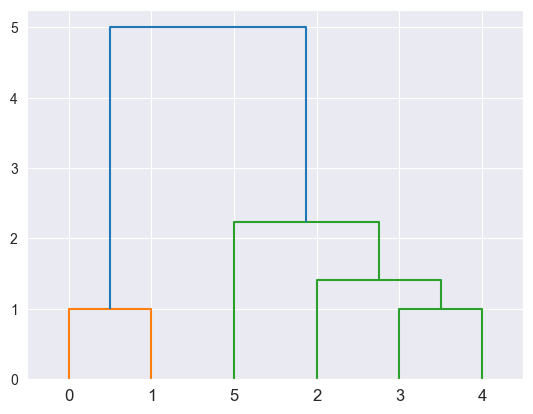

In [73]:
from scipy.cluster import hierarchy as sch
dendo=sch.dendrogram(sch.linkage(X,method='single'))

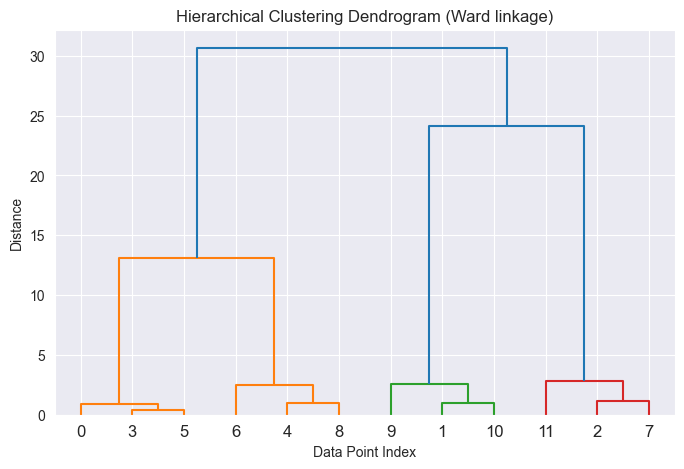

Cluster assignments: [1 3 4 1 2 1 2 4 2 3 3 4]


In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y_true=make_blobs(n_samples=12,centers=4,random_state=42,cluster_std=1.0)
X

from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

Z=linkage(X,method='ward')

plt.figure(figsize=(8,5))
dendrogram(Z,labels=np.arange(len(X)))
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

# Extract clusters by cutting the tree
clusters = fcluster(Z, t=7, criterion='distance')
print("Cluster assignments:", clusters)
